In [1]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# DATA WRANGLING

In [2]:
pitches = pd.read_csv('pitches.csv')

pitches.head(10)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0
5,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590,...,8,0.0,2.015000e+09,2.0,2.0,0.0,6.0,0.0,0.0,0.0
6,-1.088,1.610,93.3,85.3,2848.535,147.044,-46.3,3.6,23.7,14.549,...,12,0.0,2.015000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,-0.257,2.047,89.3,82.4,1433.743,185.948,7.3,4.8,23.8,-1.339,...,13,0.0,2.015000e+09,1.0,0.0,1.0,2.0,0.0,0.0,0.0
8,1.470,2.350,92.1,85.0,2666.090,146.146,-45.0,4.0,23.8,13.808,...,17,0.0,2.015000e+09,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,-1.337,1.898,89.3,82.0,1384.143,174.388,2.0,4.9,23.8,1.218,...,18,0.0,2.015000e+09,1.0,0.0,1.0,2.0,0.0,1.0,0.0


In [3]:
pitches.shape

(2867154, 40)

In [4]:
atbats = pd.read_csv('atbats.csv')

atbats.head(10)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True
5,2015000006,451594,Double,201500001,1,0,1,R,425794,L,False
6,2015000007,624585,Groundout,201500001,1,1,1,R,425794,R,False
7,2015000008,519203,Strikeout,201500001,1,2,1,R,425794,L,False
8,2015000009,516770,Groundout,201500001,1,3,1,R,425794,R,False
9,2015000010,425877,Strikeout,201500001,2,1,0,L,452657,R,True


In [5]:
atbats.shape

(740389, 11)

In [6]:
df = pd.merge(pitches, atbats, how='left', on='ab_id')
df.shape

(2867154, 50)

In [7]:
df.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'batter_id', 'event', 'g_id',
       'inning', 'o', 'p_score', 'p_throws', 'pitcher_id', 'stand', 'top'],
      dtype='object')

In [8]:
df.dtypes

px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code                object
type                object
pitch_type          object
event_num            int64
b_score            float64
ab_id              float64
b_count            float64
s_count            float64
outs               float64
pitch_num          float64
o

In [9]:
df.isnull().sum()

px                 14189
pz                 14189
start_speed        14114
end_speed          14114
spin_rate          14189
spin_dir           14189
break_angle        14189
break_length       14189
break_y            14189
ax                 14189
ay                 14189
az                 14189
sz_bot              2083
sz_top              2083
type_confidence    14189
vx0                14189
vy0                14189
vz0                14189
x                      0
x0                 14189
y                      0
y0                 14189
z0                 14189
pfx_x              14142
pfx_z              14142
nasty              14189
zone               14189
code                5719
type                   0
pitch_type         14189
event_num              0
b_score                0
ab_id                  0
b_count                0
s_count                0
outs                   0
pitch_num              0
on_1b                  0
on_2b                  0
on_3b                  0


In [10]:
def df_clean(df):
    copy = df
    for i in range(27):
        mean = np.mean(copy[copy.columns[i]])
        copy[copy.columns[i]] = copy[copy.columns[i]].replace(np.nan, mean)
    
    
    # convert the pitch type missing values to 'MISSING'
    copy['pitch_type'] = copy['pitch_type'].replace(np.nan, 'UN')
    copy['pitch_type'] = copy['pitch_type'].replace('UN', 'MISSING')

    # convert the code missing values to 'MISSING'
    copy['code'] = copy['code'].replace(np.nan, 'MISSING')
    
    return copy

In [11]:
df_clean(df)
df.isnull().sum()

px                 0
pz                 0
start_speed        0
end_speed          0
spin_rate          0
spin_dir           0
break_angle        0
break_length       0
break_y            0
ax                 0
ay                 0
az                 0
sz_bot             0
sz_top             0
type_confidence    0
vx0                0
vy0                0
vz0                0
x                  0
x0                 0
y                  0
y0                 0
z0                 0
pfx_x              0
pfx_z              0
nasty              0
zone               0
code               0
type               0
pitch_type         0
event_num          0
b_score            0
ab_id              0
b_count            0
s_count            0
outs               0
pitch_num          0
on_1b              0
on_2b              0
on_3b              0
batter_id          0
event              0
g_id               0
inning             0
o                  0
p_score            0
p_throws           0
pitcher_id   

In [12]:
df['pitch_type'].unique()

array(['FF', 'CU', 'FC', 'SI', 'CH', 'FT', 'IN', 'SL', 'MISSING', 'KC',
       'EP', 'FS', 'FO', 'PO', 'KN', 'SC', 'FA', 'AB'], dtype=object)

In [13]:
df['pitch_type'].value_counts()

FF         1014877
SL          450578
FT          337983
CH          292789
SI          242504
CU          234391
FC          149756
KC           66484
FS           43705
MISSING      14246
KN           11260
IN            6197
EP             815
FO             810
PO             628
SC             113
FA               9
AB               9
Name: pitch_type, dtype: int64

In [14]:
# create a duplicate pitch type column
df['fastball'] = df['pitch_type']

# replace all fastballs with a value of FF in duplicate column
df['fastball'] = df['fastball'].replace('FT', 'FF')
df['fastball'] = df['fastball'].replace('FC', 'FF')
df['fastball'] = df['fastball'].replace('FA', 'FF')

# populate the fastball column with the correct values
df['fastball'] = np.where(df['fastball'] == 'FF', 1, 0)

df['fastball'].value_counts()

1    1502625
0    1364529
Name: fastball, dtype: int64

In [15]:
df.head(10)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,fastball
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,Groundout,201500001,1,1,0,L,452657,L,True,1
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,Groundout,201500001,1,1,0,L,452657,L,True,1
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,Groundout,201500001,1,1,0,L,452657,L,True,1
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,Groundout,201500001,1,1,0,L,452657,L,True,1
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,Groundout,201500001,1,1,0,L,452657,L,True,0
5,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590,...,Groundout,201500001,1,1,0,L,452657,L,True,1
6,-1.088,1.610,93.3,85.3,2848.535,147.044,-46.3,3.6,23.7,14.549,...,Double,201500001,1,1,0,L,452657,L,True,1
7,-0.257,2.047,89.3,82.4,1433.743,185.948,7.3,4.8,23.8,-1.339,...,Double,201500001,1,1,0,L,452657,L,True,1
8,1.470,2.350,92.1,85.0,2666.090,146.146,-45.0,4.0,23.8,13.808,...,Single,201500001,1,1,0,L,452657,R,True,1
9,-1.337,1.898,89.3,82.0,1384.143,174.388,2.0,4.9,23.8,1.218,...,Single,201500001,1,1,0,L,452657,R,True,1


# EDA

In [16]:
fastball = df[df['fastball'] == 1]
nonfastball = df[df['fastball'] == 0]

In [17]:
fastball.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,fastball
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,Groundout,201500001,1,1,0,L,452657,L,True,1
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,Groundout,201500001,1,1,0,L,452657,L,True,1
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,Groundout,201500001,1,1,0,L,452657,L,True,1
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,Groundout,201500001,1,1,0,L,452657,L,True,1
5,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590,...,Groundout,201500001,1,1,0,L,452657,L,True,1


In [18]:
nonfastball.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,fastball
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,Groundout,201500001,1,1,0,L,452657,L,True,0
11,0.200,2.643,90.5,83.7,2186.173,119.214,-34.4,6.3,23.8,17.411,...,Strikeout,201500001,1,2,0,L,452657,R,True,0
13,-0.711,1.971,76.3,71.2,818.890,283.898,11.6,11.0,23.9,-6.127,...,Strikeout,201500001,1,2,0,L,452657,R,True,0
19,-1.585,1.720,89.5,82.2,2357.290,230.354,38.0,6.0,23.8,-16.390,...,Double,201500001,1,0,1,R,425794,L,False,0
22,1.703,0.220,76.1,69.8,1844.187,38.345,-12.2,15.1,23.8,8.791,...,Groundout,201500001,1,1,1,R,425794,R,False,0


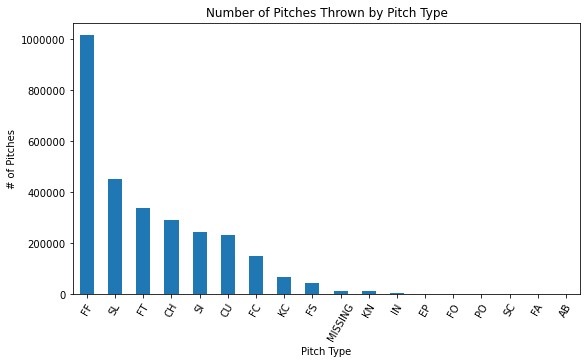

In [19]:
_ = plt.figure(figsize=(20,5))
_ = plt.subplot(1,2,1)
_ = df['pitch_type'].value_counts().plot.bar()
_ = plt.title('Number of Pitches Thrown by Pitch Type', size='large')
_ = plt.xlabel('Pitch Type')
_ = plt.ylabel('# of Pitches')
_ = plt.ticklabel_format(style='plain', axis='y')
_ = plt.xticks(rotation=60)

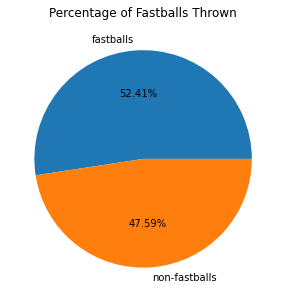

In [20]:
_ = plt.figure(figsize=(20,5))
_ = plt.subplot(1,2,2)
_ = df['fastball'].value_counts().plot.pie(labels=['fastballs', 'non-fastballs'], autopct='%.2f%%')
_ = plt.title('Percentage of Fastballs Thrown', size='large')
_ = plt.ylabel(None)

In [21]:
no_runners = df[(df['on_1b'] == 0) & (df['on_2b'] == 0) & (df['on_3b'] == 0)]
on_1b = df[(df['on_1b'] == 1) & (df['on_2b'] == 0) & (df['on_3b'] == 0)]
on_2b = df[(df['on_1b'] == 0) & (df['on_2b'] == 1) & (df['on_3b'] == 0)]
on_3b = df[(df['on_1b'] == 0) & (df['on_2b'] == 0) & (df['on_3b'] == 1)]
on_1b2b = df[(df['on_1b'] == 1) & (df['on_2b'] == 1) & (df['on_3b'] == 0)]
on_1b3b = df[(df['on_1b'] == 1) & (df['on_2b'] == 0) & (df['on_3b'] == 1)]
on_2b3b = df[(df['on_1b'] == 0) & (df['on_2b'] == 1) & (df['on_3b'] == 1)]
bases_loaded = df[(df['on_1b'] == 1) & (df['on_2b'] == 1) & (df['on_3b'] == 1)]

In [22]:
# Calculating the fastball percentage for every scenario
runners_list = [no_runners, on_1b, on_2b, on_3b, on_1b2b, on_1b3b, on_2b3b, bases_loaded]
runners_data = []
for i in range(len(runners_list)):
    runners_data.append(np.sum(runners_list[i]['fastball']) / len(runners_list[i]))

runners_data

[0.5308722325178434,
 0.5460058961258093,
 0.4785657024063481,
 0.4821360596008483,
 0.505191302355612,
 0.5012471291334305,
 0.44559380780489555,
 0.5272290196320153]

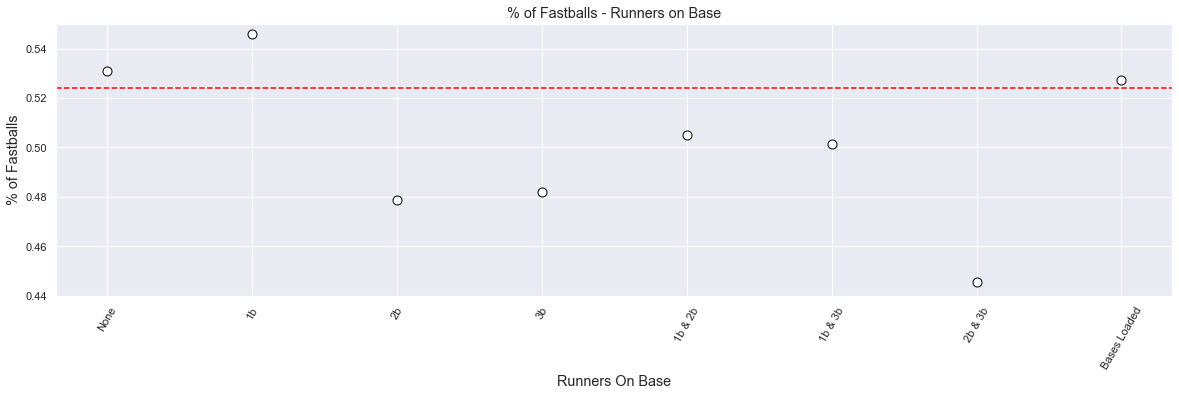

In [23]:
_ = sns.set()
_ = plt.figure(figsize=(20,5))
_ = plt.plot(np.arange(len(runners_data)), runners_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Runners on Base', size='large')
_ = plt.xlabel('Runners On Base', size='large')
_ = plt.ylabel('% of Fastballs', size='large')
_ = plt.xticks(np.arange(len(runners_data)), ['None', '1b', '2b', '3b', '1b & 2b', '1b & 3b', '2b & 3b', 'Bases Loaded'], rotation=60)
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.44, .55))

In [24]:
# Dividing the data based on batting count
count_0_0 = df[(df['b_count'] == 0) & (df['s_count'] == 0)]
count_0_1 = df[(df['b_count'] == 0) & (df['s_count'] == 1)]
count_0_2 = df[(df['b_count'] == 0) & (df['s_count'] == 2)]
count_1_0 = df[(df['b_count'] == 1) & (df['s_count'] == 0)]
count_1_1 = df[(df['b_count'] == 1) & (df['s_count'] == 1)]
count_1_2 = df[(df['b_count'] == 1) & (df['s_count'] == 2)]
count_2_0 = df[(df['b_count'] == 2) & (df['s_count'] == 0)]
count_2_1 = df[(df['b_count'] == 2) & (df['s_count'] == 1)]
count_2_2 = df[(df['b_count'] == 2) & (df['s_count'] == 2)]
count_3_0 = df[(df['b_count'] == 3) & (df['s_count'] == 0)]
count_3_1 = df[(df['b_count'] == 3) & (df['s_count'] == 1)]
count_3_2 = df[(df['b_count'] == 3) & (df['s_count'] == 2)]

# Calculating the fastball percentage for every scenario
count_list = [count_0_0, count_0_1, count_0_2, 
              count_1_0, count_1_1, count_1_2, 
              count_2_0, count_2_1, count_2_2, 
              count_3_0, count_3_1, count_3_2]
count_data = []
for i in range(len(count_list)):
    count_data.append(np.sum(count_list[i]['fastball']) / len(count_list[i]))

count_data

[0.5581587618086542,
 0.4834946481284122,
 0.45932137412008955,
 0.5469589195195731,
 0.47945991157844425,
 0.4376433792884699,
 0.6451504818968405,
 0.5571535115798645,
 0.46801969351213957,
 0.738356694342767,
 0.706718940969191,
 0.5847635777227438]

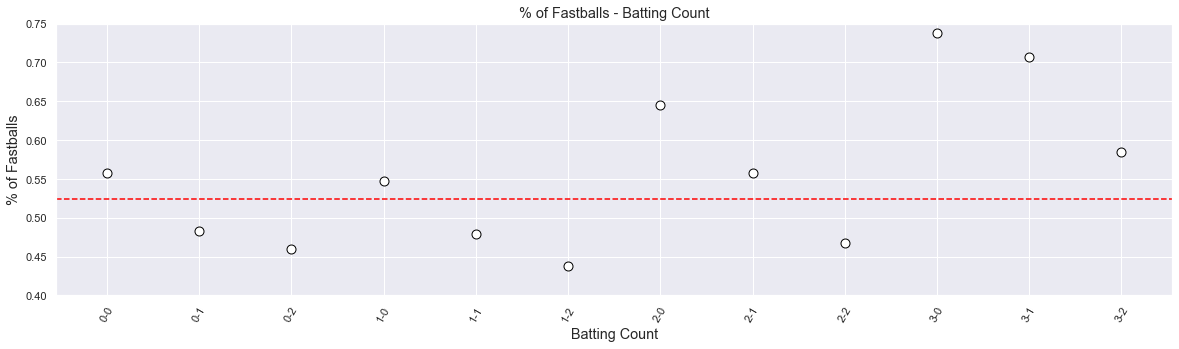

In [25]:
# Graphing the results
_ = sns.set()
_ = plt.figure(figsize=(20,5))
_ = plt.plot(np.arange(len(count_data)), count_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Batting Count', size='large')
_ = plt.xlabel('Batting Count', size='large')
_ = plt.ylabel('% of Fastballs', size='large')
_ = plt.xticks(np.arange(len(count_data)), ['0-0', '0-1', '0-2', '1-0', '1-1', '1-2', '2-0', '2-1', '2-2', '3-0', '3-1', '3-2'], rotation=60)
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.40, .75))

In [26]:
# Dividing the data by pitch sequence
pitch1 = df[df['pitch_num'] == 1]
pitch2 = df[df['pitch_num'] == 2]
pitch3 = df[df['pitch_num'] == 3]
pitch4 = df[df['pitch_num'] == 4]
pitch5 = df[df['pitch_num'] == 5]
pitch6 = df[df['pitch_num'] == 6]
pitchover = df[df['pitch_num'] > 6]

# Calculating the fastball percentage for each pitch
pitch_list = [pitch1, pitch2, pitch3, pitch4, pitch5, pitch6, pitchover]
pitch_data = []
for i in range(len(pitch_list)):
    pitch_data.append(np.sum(pitch_list[i]['fastball']) / len(pitch_list[i]))

    
pitch_data

[0.5581587618086542, 0.5115976034808757, 0.5067390493890871, 0.5073973921882371, 0.5177821203570144, 0.5200341064589107, 0.5403591808300294]


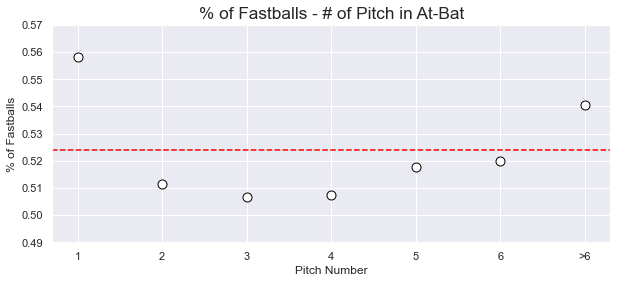

In [27]:
# Graphing the results
_ = sns.set()
_ = plt.figure(figsize=(10,4))
_ = plt.plot(np.arange(len(pitch_data)), pitch_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - # of Pitch in At-Bat', size='x-large')
_ = plt.xlabel('Pitch Number')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(pitch_data)), ['1', '2', '3', '4', '5', '6', '>6'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.49, .57))

In [28]:
# Dividing the data by inning
first_inn = df[df['inning'] == 1]
second_inn = df[df['inning'] == 2]
third_inn = df[df['inning'] == 3]
fourth_inn = df[df['inning'] == 4]
fifth_inn = df[df['inning'] == 5]
sixth_inn = df[df['inning'] == 6]
seventh_inn = df[df['inning'] == 7]
eighth_inn = df[df['inning'] == 8]
ninth_inn = df[df['inning'] == 9]
extra_inn = df[df['inning'] > 9]

# Calculating the fastball percentage for each inning
inning_list = [first_inn, second_inn, third_inn, 
               fourth_inn, fifth_inn, sixth_inn, 
               seventh_inn, eighth_inn, ninth_inn, extra_inn]
inning_data = []
for i in range(len(inning_list)):
    inning_data.append(np.sum(inning_list[i]['fastball']) / len(inning_list[i]))

inning_data

[0.5860303627748419, 0.5460199358191576, 0.5173299506481376, 0.49899914212181873, 0.5007393475376719, 0.4981620405101275, 0.5134705486023355, 0.521698180212396, 0.5391509491820639, 0.5006379728636895]


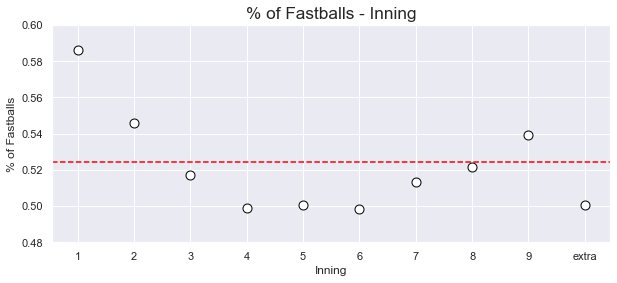

In [29]:
# Graphing the results
_ = sns.set()
_ = plt.figure(figsize=(10,4))
_ = plt.plot(np.arange(len(inning_data)), inning_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Inning', size='x-large')
_ = plt.xlabel('Inning')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(inning_data)), ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'extra'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.48, .60))

In [30]:
# Dividing the data based on pitcher and batter handedness
RvR = df[(df['p_throws'] == 'R') & (df['stand'] == 'R')]
LvR = df[(df['p_throws'] == 'L') & (df['stand'] == 'R')]
RvL = df[(df['p_throws'] == 'R') & (df['stand'] == 'L')]
LvL = df[(df['p_throws'] == 'L') & (df['stand'] == 'L')]

# Calculate the fastball percentage for each circumstance
PvB_list = [RvR, LvR, RvL, LvL]
PvB_data = []

for i in range(len(PvB_list)):
    PvB_data.append(np.sum(PvB_list[i]['fastball']) / len(PvB_list[i]))

PvB_data

[0.5271091095439215,
 0.5096706449454218,
 0.5327840292077282,
 0.5056976251450891]

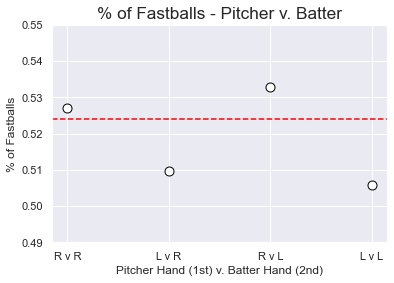

In [31]:
# Graphing the results
_ = sns.set()
_ = plt.figure(figsize=(6,4))
_ = plt.plot(np.arange(len(PvB_data)), PvB_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Pitcher v. Batter', size='x-large')
_ = plt.xlabel('Pitcher Hand (1st) v. Batter Hand (2nd)')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(PvB_data)), ['R v R', 'L v R', 'R v L', 'L v L'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.49, .55))

In [32]:
# Dividing the data based on number of outs
no_outs = df[df['outs'] == 0]
one_outs = df[df['outs'] == 1]
two_outs = df[df['outs'] == 2]

# Calculating the fastball percentages for every scenario
outs_list = [no_outs, one_outs, two_outs]
outs_data = []
for i in range(len(outs_list)):
    outs_data.append(np.sum(outs_list[i]['fastball']) / len(outs_list[i]))
    
outs_data

[0.5438145509233508, 0.5198421343436735, 0.5076118044025494]

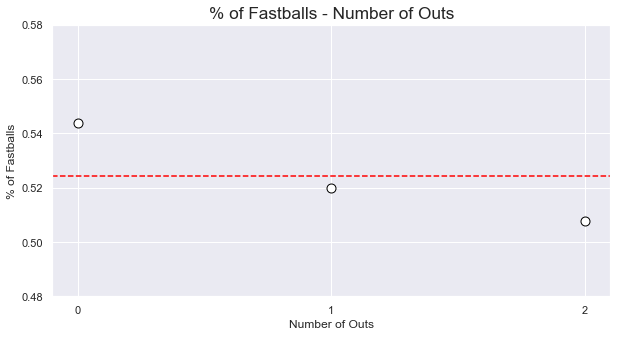

In [33]:
_ = sns.set()
_ = plt.figure(figsize=(10,5))
_ = plt.plot(np.arange(len(outs_data)), outs_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Number of Outs', size='x-large')
_ = plt.xlabel('Number of Outs')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(outs_data)), ['0', '1', '2'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.48, .58))

In [34]:
# Dividing the data based on game score
tie = df[(df['p_score'] - df['b_score']) == 0]
pitcher1 = df[(df['p_score'] - df['b_score']) == 1]
pitcher2 = df[(df['p_score'] - df['b_score']) == 2]
pitcher3 = df[(df['p_score'] - df['b_score']) == 3]
pitcher4 = df[(df['p_score'] - df['b_score']) == 4]
pitcher5 = df[(df['p_score'] - df['b_score']) == 5]
pitcher6 = df[(df['p_score'] - df['b_score']) == 6]
pitcher7 = df[(df['p_score'] - df['b_score']) == 7]
pitcher8 = df[(df['p_score'] - df['b_score']) == 8]
pitcherplus = df[(df['p_score'] - df['b_score']) > 8]
batter1 = df[(df['b_score'] - df['p_score']) == 1]
batter2 = df[(df['b_score'] - df['p_score']) == 2]
batter3 = df[(df['b_score'] - df['p_score']) == 3]
batter4 = df[(df['b_score'] - df['p_score']) == 4]
batter5 = df[(df['b_score'] - df['p_score']) == 5]
batter6 = df[(df['b_score'] - df['p_score']) == 6]
batter7 = df[(df['b_score'] - df['p_score']) == 7]
batter8 = df[(df['b_score'] - df['p_score']) == 8]
batterplus = df[(df['b_score'] - df['p_score']) > 8]

# Calculating the fastball percentage for each score
score_list = [pitcherplus, pitcher8, pitcher7, 
              pitcher6, pitcher5, pitcher4, 
              pitcher3, pitcher2, pitcher1, 
              tie, batter1, batter2, batter3,
              batter4, batter5, batter6, batter7, 
              batter8, batterplus]
score_data = []
for i in range(len(score_list)):
    score_data.append(np.sum(score_list[i]['fastball']) / len(score_list[i]))

    
score_data

[0.5555589803655642,
 0.5426627988396518,
 0.5377978767760352,
 0.5354984894259819,
 0.5335493081484736,
 0.5354326508476988,
 0.5335377777225971,
 0.528500567840203,
 0.5258550247592648,
 0.5412263621705807,
 0.5092101781555219,
 0.5001447486057303,
 0.4962938739917157,
 0.5025579934988179,
 0.5109248219317747,
 0.5014845094664372,
 0.5092047252044559,
 0.5014702679154868,
 0.5111321185252795]

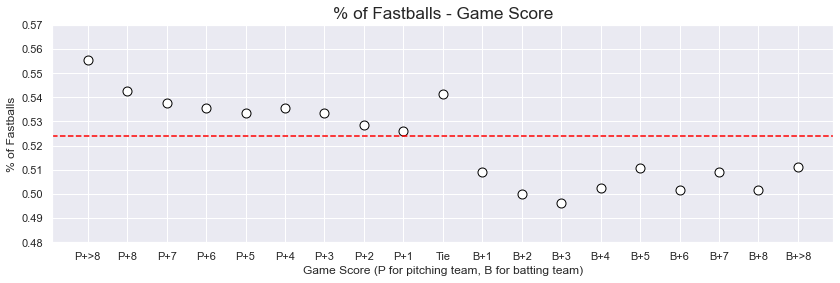

In [35]:
# Graphing the results
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = plt.plot(np.arange(len(score_data)), score_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Game Score', size='x-large')
_ = plt.xlabel('Game Score (P for pitching team, B for batting team)')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(score_data)), ['P+>8', 'P+8', 'P+7', 'P+6', 'P+5', 'P+4', 'P+3', 'P+2', 'P+1', 'Tie', 'B+1', 'B+2', 'B+3', 'B+4', 'B+5', 'B+6', 'B+7', 'B+8', 'B+>8'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.48, .57))

# CONTINUOUS CATEGORIES

In [43]:
def ecdf(data):
    x=np.sort(data)
    y=np.arange(1, len(x) + 1) / len(x)
    return x, y

def graph_ecdf(variable, x_label, graph_title):
    _ = plt.xlabel('{}'.format(x_label))
    _ = plt.ylabel('ECDF')
    _ = plt.title('{}'.format(graph_title), size='large')

    x_fast, y_fast = ecdf(fastball['{}'.format(variable)])
    _ = plt.plot(x_fast, y_fast, marker='.', linestyle='none', label='fastballs')

    x_nofast, y_nofast = ecdf(nonfastball['{}'.format(variable)])
    _ = plt.plot(x_nofast, y_nofast, marker='.', linestyle='none', label='non-fastballs')

    _ = plt.legend()

def calculate_stats(df_fastball, df_nofastball):
    df_fastball_mean = np.mean(df_fastball)
    df_fastball_median = np.nanmedian(df_fastball)
    df_fastball_std = np.std(df_fastball)
    print("fastballs mean = {}".format(df_fastball_mean))
    print('fastballs median = {}'.format(df_fastball_median))
    print('fastballs std = {}'.format(df_fastball_std))

    df_nofastball_mean = np.mean(df_nofastball)
    df_nofastball_median = np.nanmedian(df_nofastball)
    df_nofastball_std = np.std(df_nofastball)
    print("non-fastballs mean = {}".format(df_nofastball_mean))
    print('non-fastballs median = {}'.format(df_nofastball_median))
    print('non-fastballs std = {}'.format(df_nofastball_std))



<Figure size 1008x288 with 0 Axes>

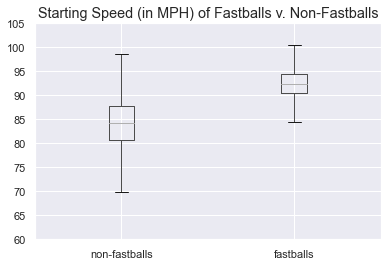

In [44]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'start_speed']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Starting Speed (in MPH) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)
_ = plt.ylim((60, 105))

In [45]:
calculate_stats(fastball['start_speed'], nonfastball['start_speed'])

fastballs mean = 92.25206255719404
fastballs median = 92.4
fastballs std = 3.11328251465449
non-fastballs mean = 84.11867982254473
non-fastballs median = 84.2
non-fastballs std = 5.50625663309324


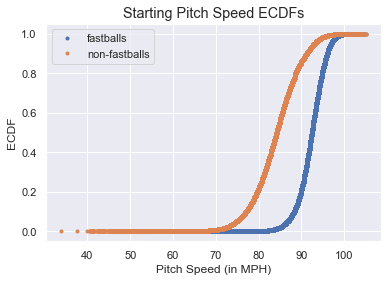

In [46]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('start_speed', 'Pitch Speed (in MPH)', 'Starting Pitch Speed ECDFs')

<Figure size 1008x288 with 0 Axes>

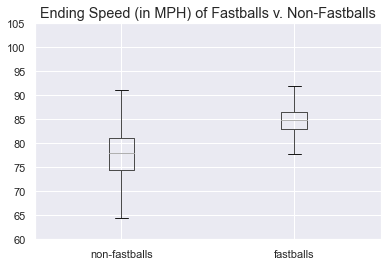

In [47]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'end_speed']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Ending Speed (in MPH) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)
_ = plt.ylim((60, 105))

In [48]:
# Calculating mean/median/std of each dataset
calculate_stats(fastball['end_speed'], nonfastball['end_speed'])

fastballs mean = 84.71384437234832
fastballs median = 84.9
fastballs std = 2.797589348974308
non-fastballs mean = 77.67250038841352
non-fastballs median = 77.9
non-fastballs std = 5.055458836390654


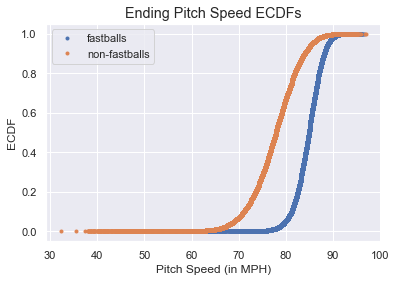

In [49]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('end_speed', 'Pitch Speed (in MPH)', 'Ending Pitch Speed ECDFs')

<Figure size 1008x288 with 0 Axes>

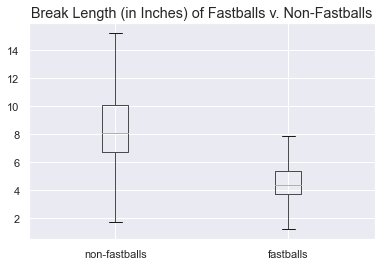

In [50]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'break_length']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Break Length (in Inches) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

In [51]:
# Calculating mean/median/std of each dataset
calculate_stats(fastball['break_length'], nonfastball['break_length'])

fastballs mean = 4.756384460527452
fastballs median = 4.4
fastballs std = 183.4618732709462
non-fastballs mean = 8.633262908200624
non-fastballs median = 8.1
non-fastballs std = 2.605044845455731


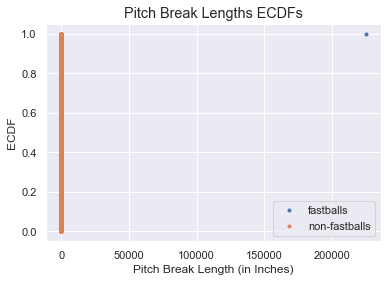

In [56]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('break_length', 'Pitch Break Length (in Inches)', 'Pitch Break Lengths ECDFs')

<Figure size 1008x288 with 0 Axes>

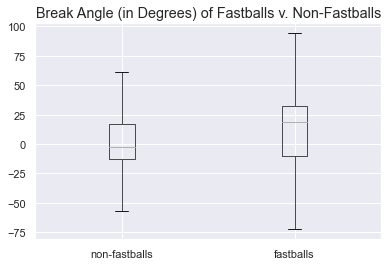

In [57]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'break_angle']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Break Angle (in Degrees) of Fastballs v. Non-Fastballs', size = 'large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

In [58]:
# Calculating mean/median/std of each dataset
calculate_stats(fastball['break_angle'], nonfastball['break_angle'])

fastballs mean = 10.45212198652352
fastballs median = 18.7
fastballs std = 27.007275234565984
non-fastballs mean = 0.7780986454054518
non-fastballs median = -2.7
non-fastballs std = 19.905312918935554


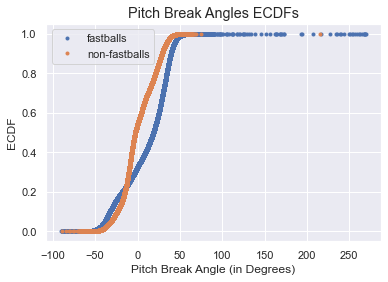

In [60]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('break_angle', 'Pitch Break Angle (in Degrees)', 'Pitch Break Angles ECDFs')

<Figure size 1008x288 with 0 Axes>

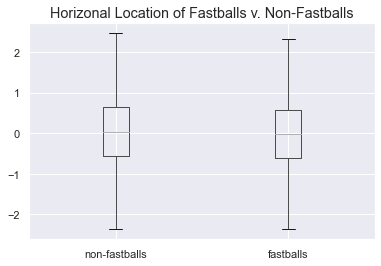

In [61]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'px']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Horizonal Location of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

In [62]:
# Calculating mean/median/std of each dataset
calculate_stats(fastball['px'], nonfastball['px'])

fastballs mean = -0.022860386603382302
fastballs median = -0.018000000000000002
fastballs std = 0.8454361958487273
non-fastballs mean = 0.038984121060254846
non-fastballs median = 0.036869242093462005
non-fastballs std = 0.9366266454685996


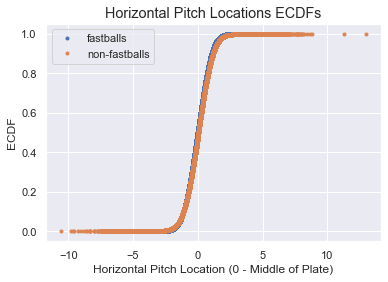

In [63]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('px', 'Horizontal Pitch Location (0 - Middle of Plate)', 'Horizontal Pitch Locations ECDFs')

<Figure size 1008x288 with 0 Axes>

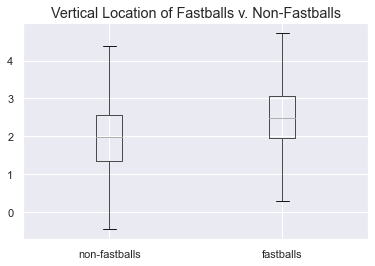

In [64]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'pz']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Vertical Location of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

In [65]:
# Calculating mean/median/std of each dataset
calculate_stats(fastball['pz'], nonfastball['pz'])

fastballs mean = 2.5134159513717673
fastballs median = 2.49405650167963
fastballs std = 0.8512417854117292
non-fastballs mean = 1.9703519695156864
non-fastballs median = 1.9809999999999999
non-fastballs std = 0.9592480144938684


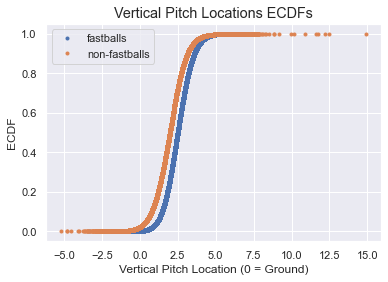

In [66]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('pz', 'Vertical Pitch Location (0 = Ground)', 'Vertical Pitch Locations ECDFs')

<Figure size 1008x288 with 0 Axes>

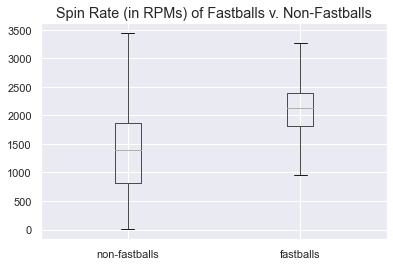

In [67]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'spin_rate']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Spin Rate (in RPMs) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

In [68]:
# Calculating mean/median/std of each dataset
calculate_stats(fastball['spin_rate'], nonfastball['spin_rate'])

fastballs mean = 2061.3367711085334
fastballs median = 2135.988
fastballs std = 515.2404345728222
non-fastballs mean = 1367.5950509003708
non-fastballs median = 1389.049
non-fastballs std = 655.7903614495049


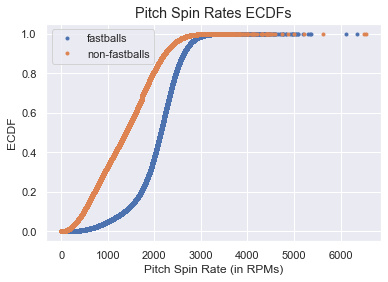

In [69]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('spin_rate', 'Pitch Spin Rate (in RPMs)', 'Pitch Spin Rates ECDFs')

<Figure size 1008x288 with 0 Axes>

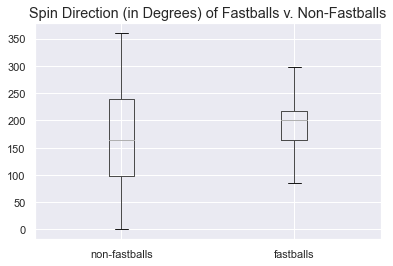

In [70]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball', 'spin_dir']].boxplot(by = 'fastball', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Spin Direction (in Degrees) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

In [71]:
# Calculating mean/median/std of each dataset
calculate_stats(fastball['spin_dir'], nonfastball['spin_dir'])

fastballs mean = 191.99410063988805
fastballs median = 200.666
fastballs std = 35.92327752888884
non-fastballs mean = 167.27701797628598
non-fastballs median = 163.722
non-fastballs std = 88.11822452126334


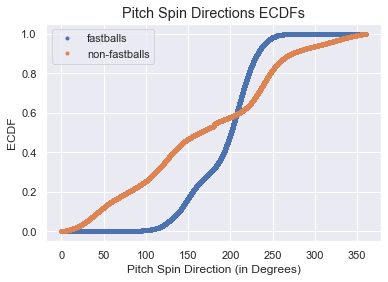

In [72]:
# Comparing the Empirical Cumulative Distribution Function (ECDF) for each of the datasets
graph_ecdf('spin_dir', 'Pitch Spin Direction (in Degrees)', 'Pitch Spin Directions ECDFs')

# PRE-PROCESSING

In [73]:
df_model = df.loc[:, ['ab_id', 'fastball', 'on_1b', 'on_2b', 'on_3b']]

df_model.head(10)

,ab_id,fastball,on_1b,on_2b,on_3b
0,2.015000e+09,1,0.0,0.0,0.0
1,2.015000e+09,1,0.0,0.0,0.0
2,2.015000e+09,1,0.0,0.0,0.0
3,2.015000e+09,1,0.0,0.0,0.0
4,2.015000e+09,0,0.0,0.0,0.0
5,2.015000e+09,1,0.0,0.0,0.0
6,2.015000e+09,1,0.0,0.0,0.0
7,2.015000e+09,1,0.0,0.0,0.0
8,2.015000e+09,1,0.0,1.0,0.0
9,2.015000e+09,1,0.0,1.0,0.0


In [74]:
df_model['p_throws_num'] = np.where(df.loc[:, 'p_throws'] == 'R', 1, 0)
df_model['stand_num'] = np.where(df.loc[:, 'stand'] == 'R', 1, 0)
df_model['top_num'] = np.where(df.loc[:, 'top'] == True, 1, 0)

df_model.head()

,ab_id,fastball,on_1b,on_2b,on_3b,p_throws_num,stand_num,top_num
0,2.015000e+09,1,0.0,0.0,0.0,0,0,1
1,2.015000e+09,1,0.0,0.0,0.0,0,0,1
2,2.015000e+09,1,0.0,0.0,0.0,0,0,1
3,2.015000e+09,1,0.0,0.0,0.0,0,0,1
4,2.015000e+09,0,0.0,0.0,0.0,0,0,1


In [75]:
# Combine the outlier values into one column
df['pitch_num'] = df['pitch_num'].replace([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 10)

# Create the dummy variables
df_dummies = pd.get_dummies(df['pitch_num'], prefix='pitch_num', drop_first=True)

# Add the dummy variables to the model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

df_model.head(10)

,ab_id,fastball,on_1b,on_2b,on_3b,p_throws_num,stand_num,top_num,pitch_num_2.0,pitch_num_3.0,pitch_num_4.0,pitch_num_5.0,pitch_num_6.0,pitch_num_7.0,pitch_num_8.0,pitch_num_9.0,pitch_num_10.0
0,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0
1,2.015000e+09,1,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0
2,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0
3,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0
4,2.015000e+09,0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0
5,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0
6,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0
7,2.015000e+09,1,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0
8,2.015000e+09,1,0.0,1.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0
9,2.015000e+09,1,0.0,1.0,0.0,0,1,1,1,0,0,0,0,0,0,0,0


In [76]:
df['b_count'].value_counts()

0.0    1292084
1.0     855623
2.0     483926
3.0     235508
4.0         13
Name: b_count, dtype: int64

In [77]:
# Replace values of 4 as 3
df['b_count'] = df['b_count'].replace(4, 3)

# Create the dummy variables
df_dummies = pd.get_dummies(df['b_count'], prefix='b_count', drop_first=True)

# Add the dummy variables to the model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

df_model.head(10)

,ab_id,fastball,on_1b,on_2b,on_3b,p_throws_num,stand_num,top_num,pitch_num_2.0,pitch_num_3.0,pitch_num_4.0,pitch_num_5.0,pitch_num_6.0,pitch_num_7.0,pitch_num_8.0,pitch_num_9.0,pitch_num_10.0,b_count_1.0,b_count_2.0,b_count_3.0
0,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2.015000e+09,1,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,2.015000e+09,0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
5,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
6,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,2.015000e+09,1,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
8,2.015000e+09,1,0.0,1.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,2.015000e+09,1,0.0,1.0,0.0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0


In [78]:
# Create the dummy variables
df_dummies = pd.get_dummies(df['s_count'], prefix='s_count', drop_first=True)

# Add the dummy variables to the model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

In [79]:
# Create the dummy variables
df_dummies = pd.get_dummies(df['outs'], prefix='outs', drop_first=True)

# Add the dummy variables to the model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

In [80]:
df['inning'].value_counts()

1     333237
8     323829
7     322073
6     319920
4     318227
2     316917
3     316908
5     315819
9     244579
10     25309
11     14383
12      7560
13      4244
14      1809
15      1076
16       693
17       308
18       191
19        72
Name: inning, dtype: int64

In [81]:
# Combine all extra inning games into one column
df['inning'] = df['inning'].replace([11, 12, 13, 14, 15, 16, 17, 18, 19], 10)

# Create the dummy variables
df_dummies = pd.get_dummies(df['inning'], prefix='inning', drop_first=True)

# Add the dummy variables to the model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

In [82]:
# Create the new difference in score column
df['pitcher_lead'] = df['p_score'] - df['b_score']

# Combine the outlier score differences
df['pitcher_lead'] = df['pitcher_lead'].replace([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24], 10)
df['pitcher_lead'] = df['pitcher_lead'].replace([-11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -23, -24], -10)

# Create the dummy variables
df_dummies = pd.get_dummies(df['pitcher_lead'], prefix='pitcher_lead', drop_first=True)

# Add the dummy variables to the model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

In [83]:
df_model.head(10)

,ab_id,fastball,on_1b,on_2b,on_3b,p_throws_num,stand_num,top_num,pitch_num_2.0,pitch_num_3.0,...,pitcher_lead_1.0,pitcher_lead_2.0,pitcher_lead_3.0,pitcher_lead_4.0,pitcher_lead_5.0,pitcher_lead_6.0,pitcher_lead_7.0,pitcher_lead_8.0,pitcher_lead_9.0,pitcher_lead_10.0
0,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.015000e+09,1,0.0,0.0,0.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.015000e+09,0,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.015000e+09,1,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.015000e+09,1,0.0,0.0,0.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,2.015000e+09,1,0.0,1.0,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2.015000e+09,1,0.0,1.0,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_model.shape

(2867154, 53)

# MODELING

In [86]:
# create the sample dataframe
df_sample = df_model.sample(145000, random_state=6)

# verify the fastball/non-fastball split
df_sample['fastball'].sum() / len(df_sample)

0.5240551724137931

In [87]:
# split the dataframe
X = df_sample.iloc[:, 2:]
y = df_sample.iloc[:, 1]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Training Set Accuracy: {}'.format(lr.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(lr.score(X_test, y_test)))

Training Set Accuracy: 0.5572689655172414
Test Set Accuracy: 0.5494068965517241


In [89]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
y_pred_sgdc = sgdc.predict(X_test)
print('Training Set Accuracy: {}'.format(sgdc.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(sgdc.score(X_test, y_test)))

Training Set Accuracy: 0.5483770114942529
Test Set Accuracy: 0.5442482758620689


In [90]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Training Set Accuracy: {}'.format(rfc.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(rfc.score(X_test, y_test)))

Training Set Accuracy: 0.8042390804597701
Test Set Accuracy: 0.5279724137931034


In [91]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print('Training Set Accuracy: {}'.format(gbc.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(gbc.score(X_test, y_test)))

Training Set Accuracy: 0.5626390804597701
Test Set Accuracy: 0.550896551724138


In [ ]:
# add the pitcher_id column
df_model['pitcher_id'] = df.loc[:, 'pitcher_id']

# build the function
def inning_pitch_count(df):
    for index in df.index:
        if index == 0:
            df.loc[index, 'inning_pitch_count'] = 1
        elif df.loc[index, 'pitcher_id'] == df.loc[index-1, 'pitcher_id']:
            df.loc[index, 'inning_pitch_count'] = df.loc[index-1, 'inning_pitch_count'] + 1
        else:
            df.loc[index, 'inning_pitch_count'] = 1

# run the function using the apply() method
df_model['inning_pitch_count'] = df_model.apply(inning_pitch_count(df_model))

# normalize the data because it is a continuous variable
min_max_scaler = MinMaxScaler()
df_model['inning_pitch_count'] = min_max_scaler.fit_transform(df_model.loc[:, 'inning_pitch_count'].values.astype(float))

In [ ]:
# create a new dataframe to build the new features
df_prev_pitch = df.loc[:, ['pitch_num', 'pitch_type', 'px', 'pz']]

# shift the pitch_type, px, and pz columns down one row
df_prev_pitch['pitch_type'] = df_prev_pitch['pitch_type'].shift(1, axis=0)
df_prev_pitch['px'] = df_prev_pitch['px'].shift(1, axis=0)
df_prev_pitch['pz'] = df_prev_pitch['pz'].shift(1, axis=0)

# add the new feature columns
df_prev_pitch['pitch_type_prev'] = 0
df_prev_pitch['px_prev'] = 0
df_prev_pitch['pz_prev'] = 0

df_prev_pitch.head()

In [ ]:
# build the function
def prev_pitch(df):
    for row in df.index:
        if df.loc[row, 'pitch_num'] > 1:
            df.loc[row, 'pitch_type_prev'] = df.loc[row, 'pitch_type']
            df.loc[row, 'px_prev'] = df.loc[row, 'px']
            df.loc[row, 'pz_prev'] = df.loc[row, 'pz']
            
# run the function using the apply() method (WARINING - THIS FUNCTION TAKES A LONG TIME TO RUN)
df_prev_pitch = df_prev_pitch.apply(lambda x: prev_pitch(df_prev_pitch), axis=1)

In [ ]:
# get dummy variables
df_dummies = pd.get_dummies(df_prev_pitch['pitch_type_prev'], prefix='prev_pitch')

# delete the unneeded dummy variables
del df_dummies['prev_pitch_0']
del df_dummies['prev_pitch_MISSING']

# add the dummy variables to the model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

In [ ]:
# replace the missing and zero values with NaNs
df_prev_pitch['px_prev'] = df_prev_pitch['px_prev'].replace(0.000000, np.nan)
df_prev_pitch['px_prev'] = df_prev_pitch['px_prev'].replace(0.006600, np.nan)

# create dataframe of only outlier values and use that dataframe index to iterate and convert values in df_prev_pitch
df_outlier = df_prev_pitch[df_prev_pitch['px_prev'] > 4]
for row in df_outlier.index:
    df_prev_pitch.loc[row, 'px_prev'] = 4

df_outlier = df_prev_pitch[df_prev_pitch['px_prev'] < -4]
for row in df_outlier.index:
    df_prev_pitch.loc[row, 'px_prev'] = -4

# divide px_prev values into 15 bins
df_prev_pitch['px_prev'] = pd.cut(df_prev_pitch['px_prev'], 15)

# create dummy variables [NOTE - pd.get_dummies automatically drops NaN values]
df_dummies = pd.get_dummies(df_prev_pitch['px_prev'], prefix='px_prev')

# add dummy variables to model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

In [ ]:
# replace the missing and zero values with NaNs
df_prev_pitch['pz_prev'] = df_prev_pitch['pz_prev'].replace(0.000000, np.nan)
df_prev_pitch['pz_prev'] = df_prev_pitch['pz_prev'].replace(2.250000, np.nan)

# create dataframe of only outlier values and use that dataframe index to iterate and convert values in df_prev_pitch
df_outlier = df_prev_pitch[df_prev_pitch['pz_prev'] > 5]
for row in df_outlier.index:
    df_prev_pitch.loc[row, 'pz_prev'] = 5

df_outlier = df_prev_pitch[df_prev_pitch['pz_prev'] < -1]
for row in df_outlier.index:
    df_prev_pitch.loc[row, 'pz_prev'] = -1

# divide pz_prev values into 15 bins
df_prev_pitch['pz_prev'] = pd.cut(df_prev_pitch['pz_prev'], 15)

# create dummy variables [NOTE - pd.get_dummies automatically drops NaN values]
df_dummies = pd.get_dummies(df_prev_pitch['pz_prev'], prefix='pz_prev')

# add dummy variables to model dataframe
df_model = pd.concat([df_model, df_dummies], axis=1)

In [ ]:
df_model.head()

In [ ]:
df_model.shape

In [ ]:
# new sample dataframe
df_sample = df_model.sample(145000, random_state=6)

# verify the fastball/non-fastball split
df_sample['fastball'].sum() / len(df_sample)

In [ ]:
# split the dataframe
X = df_sample.iloc[:, 2:]
y = df_sample.iloc[:, 1]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Training Set Accuracy: {}'.format(lr.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(lr.score(X_test, y_test)))

In [ ]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
y_pred_sgdc = sgdc.predict(X_test)
print('Training Set Accuracy: {}'.format(sgdc.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(sgdc.score(X_test, y_test)))

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Training Set Accuracy: {}'.format(rfc.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(rfc.score(X_test, y_test)))

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print('Training Set Accuracy: {}'.format(gbc.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(gbc.score(X_test, y_test)))

In [ ]:
# Classification report Logistic Regression
print(classification_report(y_test, y_pred_lr)

In [ ]:
#Confusion Matrix Logistic Regression
print(confusion_matrix(y_test, y_pred_lr))

In [ ]:
# Classification report Gradient Boosting
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbc))

In [ ]:
# Confusion matrix Gradient Boosting
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gbc))

# FEATURE IMPORTANCE

In [ ]:
df_features = pd.DataFrame(
    {'coefficient': lr.coef_.flatten(), 'gbc_feature_importance': gbc.feature_importances_}, 
    index=df_model.columns[2:])

In [ ]:
#top features
df_features.sort_values('gbc_feature_importance', ascending=False)[:15]

In [ ]:
#Least important features
df_features.sort_values('coefficient')[:15]